In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path=pathlib.Path('/media/tris/tris_files/era-for-bw')
path

PosixPath('/media/tris/tris_files/era-for-bw')

In [4]:
df = pd.read_csv(path/'labels_proc.csv')
df.tail()

,file_name,valence,arousal,dominance,liking
1275,s32_t36,0.434444,0.773333,0.646667,0.346667
1276,s32_t37,0.312222,0.681111,0.673333,0.115556
1277,s32_t38,0.338889,0.778889,0.566667,0.122222
1278,s32_t39,0.443333,0.796667,0.538889,0.111111
1279,s32_t40,0.794444,0.447778,1.000000,0.208889


In [5]:
# np.random.seed(60)
# src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap', suffix='.png')
#        .split_by_rand_pct(0.2)
#        .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
#        .transform()
#        .databunch(bs=10).normalize(imagenet_stats))

In [7]:
np.random.seed(60)
src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap-single', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
       .transform(size=256)
       .databunch(bs=10)
       .normalize(imagenet_stats))


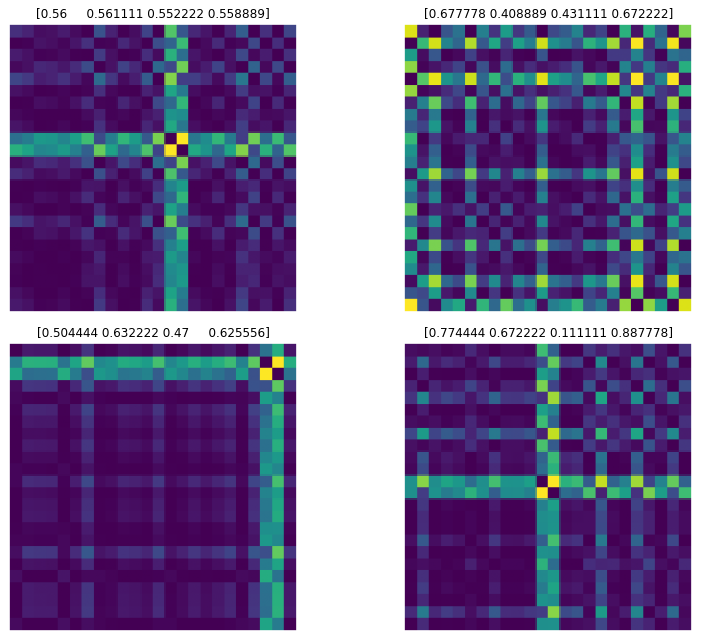

In [8]:
src.show_batch(rows=2, figsize=(12,9))

In [9]:
learn = cnn_learner(src, models.resnet34, metrics=[root_mean_squared_error])
#learn = unet_learner(src, models.resnet18, metrics=[root_mean_squared_error])

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


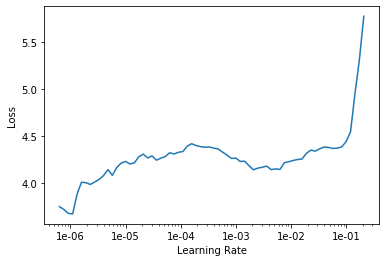

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
lr = 1e-3

In [12]:
learn.fit_one_cycle(5, slice(lr), wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,3.655233,1.076473,1.030997,00:07
1,2.416095,0.729353,0.847426,00:07
2,1.443693,0.383617,0.614417,00:07
3,0.978300,0.287122,0.533557,00:07
4,0.813095,0.263172,0.510662,00:07


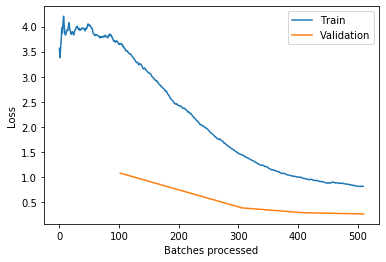

In [13]:
learn.recorder.plot_losses()

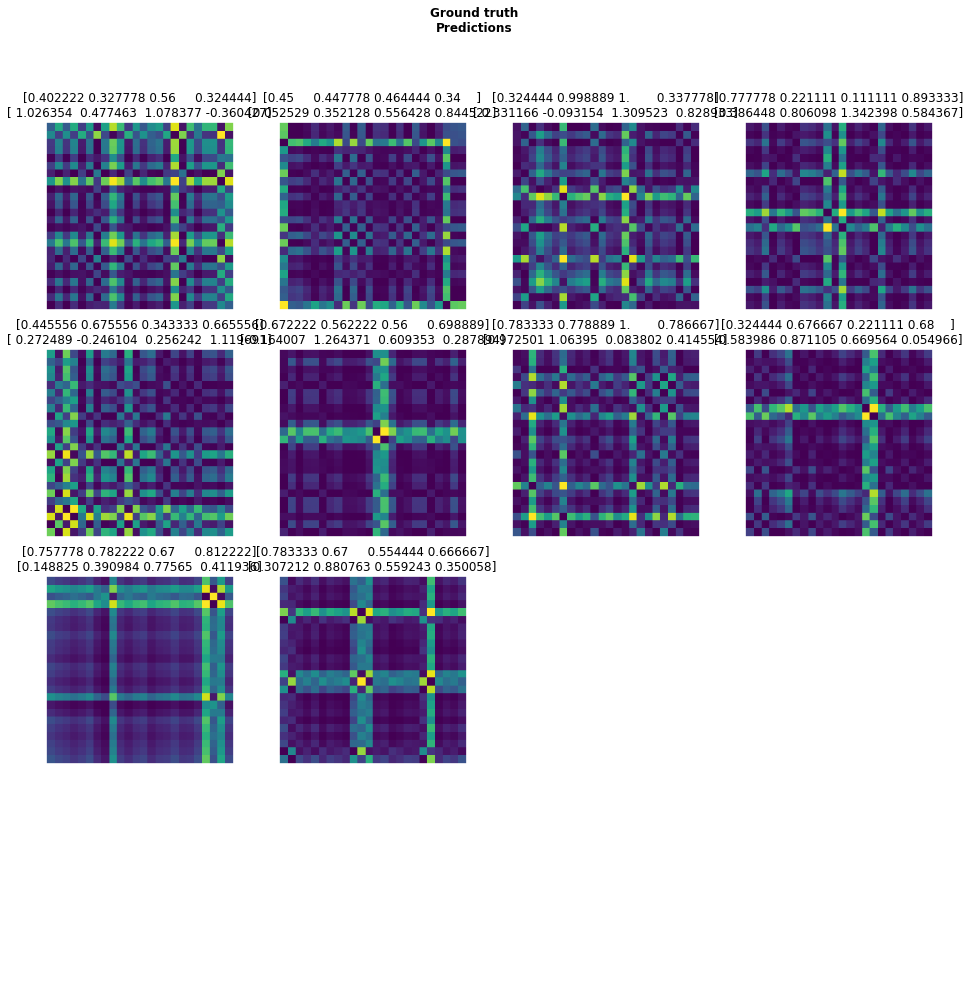

In [14]:
learn.show_results()

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


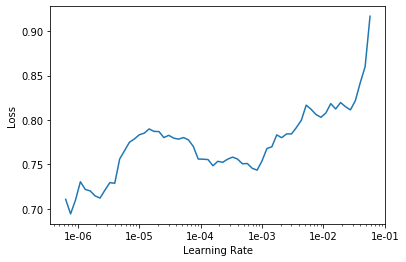

In [15]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [16]:
lr=1e-5
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.784934,0.246370,0.493879,00:09
1,0.835932,0.242955,0.490162,00:09
2,0.761800,0.243842,0.491120,00:09
3,0.759441,0.267803,0.514601,00:09
4,0.782785,0.236564,0.483378,00:09
